In [1]:
import numpy as np
import pandas as pd

In [5]:
file_path = r'C:\users\HP\teachers.csv'
df = pd.read_csv(file_path);
print(df);

    id   first_name    last_name  gender  years_of_experience   salary
0    1       Madlen     Conybear  Female                    6  27600.0
1    2         Arty       Noonan    Male                    1  12600.0
2    3     Jillayne      Younger  Female                    4  22000.0
3    4      Tamarah      Hulcoop  Female                    4  21600.0
4    5      Kennett      Bugdale    Male                    8  33900.0
5    6         Iago        Wadie    Male                   10  40700.0
6    7       Ingram      Deboick    Male                    4      NaN
7    8    Theodoric        Ewles     NaN                    6  27500.0
8    9         Mona     Hallihan  Female                    3      NaN
9   10       Amandy  Huddlestone  Female                    5  25200.0
10  11    Ammamaria     Claypole  Female                    8  32900.0
11  12         Noel      Wackley    Male                    7  29600.0
12  13       Inessa        Kubas  Female                    9      NaN
13  14

In [16]:
file_path = r'C:\users\HP\students.csv'
df = pd.read_csv(file_path)

print(df.to_string())


      id    first_name        last_name  gender   age           city          education                               email
0      1        Birgit        Mackriell  Female  15.0          Haifa       No education            bmackriell0@china.com.cn
1      2    Cristionna          Ferrick  Female  32.0      Bnei Brak        High school                   cferrick1@loc.gov
2      3         Colin             Tite     NaN   NaN    Petah Tikva        High school          ctite2@businessinsider.com
3      4         Jonis            Iston  Female  40.0      Jerusalem        High school                jiston3@edublogs.org
4      5           Dex          Goodson    Male  43.0          Haifa  Bachelor's degree              dgoodson4@e-recht24.de
5      6        Marysa          Ovenden  Female  24.0          Haifa        High school                 movenden5@zdnet.com
6      7       Fidelia           Bolver  Female  39.0      Jerusalem       No education                 fbolver6@weebly.com
7      8

In [7]:
file_path = r'C:\users\HP\courses.csv'
df = pd.read_csv(file_path);
print(df);

    course_id           course_name              course_category  teacher_id  \
0           1  Full Stack Developer         Software Development        30.0   
1           2                 Cyber      Data Science & Security         NaN   
2           3       Product Manager  Product & Business Strategy        14.0   
3           4          AI Developer         Software Development        16.0   
4           5       DevOps Engineer         Software Development        21.0   
5           6          AI Developer         Software Development         7.0   
6           7  Full Stack Developer         Software Development         NaN   
7           8          AI Developer         Software Development        14.0   
8           9          AI Developer         Software Development         7.0   
9          10       DevOps Engineer         Software Development        10.0   
10         11                 Cyber      Data Science & Security         9.0   
11         12                 Cyber     

In [9]:
file_path = r'C:\users\HP\studnet_course.csv'
df = pd.read_csv(file_path);
print(df);

       id  student_id  course_id  final_grade
0       1         247         26         81.0
1       2         113         11          NaN
2       3         125          4         63.0
3       4         455         50         72.0
4       5         140          9         59.0
..    ...         ...        ...          ...
995   996          48         39          NaN
996   997         269         35         85.0
997   998          75         42         78.0
998   999          21          4         69.0
999  1000         163         14         66.0

[1000 rows x 4 columns]


In [ ]:
##############################################################################################################################

<div style="border: 2px solid Darkred; padding: 15px; background-color: #f9f9f9;">
    <h4 style="color: Darkgreen;">
        <strong>
            1. Handle duplicate data in student dataset:
        </strong>
        <br><!-- This adds an empty line between the two parts -->
        <h5 style="color: black;">
    a. In student dataset duplicate data is if you have:<br>
        i. Different student rows with the same email
</div>

In [23]:
students_df_copy = students_df.copy();

# Check for duplicates based on the 'email' column:
# Drop duplicates and keep only the first occurrence of each email:
students_df_copy = students_df_copy.drop_duplicates(subset='email', keep='first');

print(students_df_copy);


      id  first_name  last_name  gender   age         city          education  \
0      1      Birgit  Mackriell  Female  15.0        Haifa       No education   
1      2  Cristionna    Ferrick  Female  32.0    Bnei Brak        High school   
2      3       Colin       Tite     NaN   NaN  Petah Tikva        High school   
3      4       Jonis      Iston  Female  40.0    Jerusalem        High school   
4      5         Dex    Goodson    Male  43.0        Haifa  Bachelor's degree   
..   ...         ...        ...     ...   ...          ...                ...   
495  496      Karoly   Ferreres  Female  29.0        Haifa        High school   
496  497      Rivkah   Androlli  Female  43.0        Haifa       No education   
497  498  Melisandra     Screen  Female  34.0        Haifa        High school   
498  499      Delmer      Alpin    Male   NaN        Haifa        High school   
499  500      Gillan     Terram  Female  34.0        Haifa  Bachelor's degree   

                          e

<div style="border: 2px solid Darkred; padding: 15px; background-color: #f9f9f9;">
    <h5 style="color: Darkgreen;">
        <strong>
            b. In case you find duplicate data, remove the student with less
information. Make sure you change associations in other
data sets to the duplicated student id so your data will still be
accurate.<br>
For example → If you choose to remove student_id 3
because it's duplicated with student_id 5, make sure to
change any association in other data sets from student_id 3
to student_id 5.
</div>

In [27]:
students_df_copy = students_df.copy()

duplicates = students_df_copy[students_df_copy.duplicated(subset='email', keep=False)]

for _, group in duplicates.groupby('email'):
    if len(group) > 1:
        group_sorted = group.sort_values(by=['id'], na_position='last');
        keep_row = group_sorted.iloc[0] 
        remove_row = group_sorted.iloc[1:] 
        
        student_course_path = r'C:\users\HP\studnet_course.csv'
        student_course_df = pd.read_csv(student_course_path);
        
        student_course_df.loc[student_course_df['id'] == remove_row['id'].values[0], 'id'] = keep_row['id']
        
        student_course_df.to_csv(student_course_path, index=False);

        students_df_copy = students_df_copy[students_df_copy['id'] != remove_row['id'].values[0]]

print(students_df_copy);


      id  first_name  last_name  gender   age         city          education  \
0      1      Birgit  Mackriell  Female  15.0        Haifa       No education   
1      2  Cristionna    Ferrick  Female  32.0    Bnei Brak        High school   
2      3       Colin       Tite     NaN   NaN  Petah Tikva        High school   
3      4       Jonis      Iston  Female  40.0    Jerusalem        High school   
4      5         Dex    Goodson    Male  43.0        Haifa  Bachelor's degree   
..   ...         ...        ...     ...   ...          ...                ...   
495  496      Karoly   Ferreres  Female  29.0        Haifa        High school   
496  497      Rivkah   Androlli  Female  43.0        Haifa       No education   
497  498  Melisandra     Screen  Female  34.0        Haifa        High school   
498  499      Delmer      Alpin    Male   NaN        Haifa        High school   
499  500      Gillan     Terram  Female  34.0        Haifa  Bachelor's degree   

                          e

<div style="border: 2px solid Darkred; padding: 15px; background-color: #f9f9f9;">
    <h5 style="color: Darkgreen;">
        <strong>
            2. Handle missing data in all datasets:<br><br>
a. In case the missing data in a specific column is above 5% of
all provided data rows fill the missing data with a default valid
value of your choice.
</div>

In [2]:
import pandas as pd

file_paths = [
    r'C:\users\HP\students.csv',
    r'C:\users\HP\teachers.csv',
    r'C:\users\HP\courses.csv',
    r'C:\users\HP\studnet_course.csv'
]

dataframes = []

for path in file_paths:
    df = pd.read_csv(path)
    dataframes.append(df)

default_values = {
    'students.csv': 'Unknown',   
    'teachers.csv': 'Unknown', 
    'courses.csv': 'Not Available',  
    'studnet_course.csv': 0   
}

for df, path in zip(dataframes, file_paths):
    missing_percentage = df.isnull().mean() * 100

    columns_to_fill = missing_percentage[missing_percentage > 5].index

    for column in columns_to_fill:
        if 'students' in path:
            df[column].fillna(default_values['students.csv'], inplace=True)
        elif 'teachers' in path:
            df[column].fillna(default_values['teachers.csv'], inplace=True)
        elif 'courses' in path:
            df[column].fillna(default_values['courses.csv'], inplace=True)
        elif 'studnet_course' in path:
            df[column].fillna(default_values['studnet_course.csv'], inplace=True)

for df in dataframes:
    print(df)


      id  first_name  last_name   gender      age         city  \
0      1      Birgit  Mackriell   Female     15.0        Haifa   
1      2  Cristionna    Ferrick   Female     32.0    Bnei Brak   
2      3       Colin       Tite  Unknown  Unknown  Petah Tikva   
3      4       Jonis      Iston   Female     40.0    Jerusalem   
4      5         Dex    Goodson     Male     43.0        Haifa   
..   ...         ...        ...      ...      ...          ...   
495  496      Karoly   Ferreres   Female     29.0        Haifa   
496  497      Rivkah   Androlli   Female     43.0        Haifa   
497  498  Melisandra     Screen   Female     34.0        Haifa   
498  499      Delmer      Alpin     Male  Unknown        Haifa   
499  500      Gillan     Terram   Female     34.0        Haifa   

             education                       email  
0         No education    bmackriell0@china.com.cn  
1          High school           cferrick1@loc.gov  
2          High school  ctite2@businessinsider.c

C:\Users\HP\AppData\Local\Temp\ipykernel_8292\3667262501.py:30: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].fillna(default_values['students.csv'], inplace=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_8292\3667262501.py:30: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Unknown' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df[column].fillna(default_values['students.csv'], inplace=True)
C

<div style="border: 2px solid Darkred; padding: 15px; background-color: #f9f9f9;">
    <h5 style="color: Darkgreen;">
        <strong>
           
b. In case the missing data is below 5% remove the row from
your calculations and make sure to adjust your other
datasets accordingly.
</div>

In [3]:
for df, path in zip(dataframes, file_paths):
    default_value = default_values[path.split('\\')[-1]]

    df.dropna(
        subset=df.columns[df.isnull().mean() <= 0.05],  # حذف الصفوف إذا كانت القيم المفقودة أقل من 5%
        inplace=True
    );

    df.loc[:, df.isnull().mean() > 0.05] = df.loc[:, df.isnull().mean() > 0.05].apply(
        lambda col: col.fillna(default_value)
    );

for df in dataframes:
    print(df);


      id  first_name  last_name   gender      age         city  \
0      1      Birgit  Mackriell   Female     15.0        Haifa   
1      2  Cristionna    Ferrick   Female     32.0    Bnei Brak   
2      3       Colin       Tite  Unknown  Unknown  Petah Tikva   
3      4       Jonis      Iston   Female     40.0    Jerusalem   
4      5         Dex    Goodson     Male     43.0        Haifa   
..   ...         ...        ...      ...      ...          ...   
495  496      Karoly   Ferreres   Female     29.0        Haifa   
496  497      Rivkah   Androlli   Female     43.0        Haifa   
497  498  Melisandra     Screen   Female     34.0        Haifa   
498  499      Delmer      Alpin     Male  Unknown        Haifa   
499  500      Gillan     Terram   Female     34.0        Haifa   

             education                       email  
0         No education    bmackriell0@china.com.cn  
1          High school           cferrick1@loc.gov  
2          High school  ctite2@businessinsider.c

<div style="border: 2px solid Darkred; padding: 15px; background-color: #f9f9f9;">
    <h5 style="color: Darkgreen;">
        <strong>
           
c. In case you found a row with missing data with a mandatory
column (like id, name, etc…) remove this row from your
dataset. 
</div>

In [4]:
mandatory_columns = ['id', 'name']  

for i, df in enumerate(dataframes):
    dataframes[i] = df.dropna(subset=[col for col in mandatory_columns if col in df.columns]);

for df in dataframes:
    print(df);


      id  first_name  last_name   gender      age         city  \
0      1      Birgit  Mackriell   Female     15.0        Haifa   
1      2  Cristionna    Ferrick   Female     32.0    Bnei Brak   
2      3       Colin       Tite  Unknown  Unknown  Petah Tikva   
3      4       Jonis      Iston   Female     40.0    Jerusalem   
4      5         Dex    Goodson     Male     43.0        Haifa   
..   ...         ...        ...      ...      ...          ...   
495  496      Karoly   Ferreres   Female     29.0        Haifa   
496  497      Rivkah   Androlli   Female     43.0        Haifa   
497  498  Melisandra     Screen   Female     34.0        Haifa   
498  499      Delmer      Alpin     Male  Unknown        Haifa   
499  500      Gillan     Terram   Female     34.0        Haifa   

             education                       email  
0         No education    bmackriell0@china.com.cn  
1          High school           cferrick1@loc.gov  
2          High school  ctite2@businessinsider.c

<div style="border: 2px solid Darkred; padding: 15px; background-color: #f9f9f9;">
    <h5 style="color: Darkgreen;">
        <strong>
            Data analysis:<br>
Use the copy() datasets from your data preparation answer and answer
the following questions:<br><br>
1. Explore the students.csv dataset and answer the following
questions, base your answers with data calculations and
visualizations if needed:<br><br>
a. Count the number of students by gender, show a dataframe
with each gender type and how many students we have from
that type.<br>
Plot bar chart to visualize your result.
</div>



   Gender  Count
0    Male    220
1  Female    215


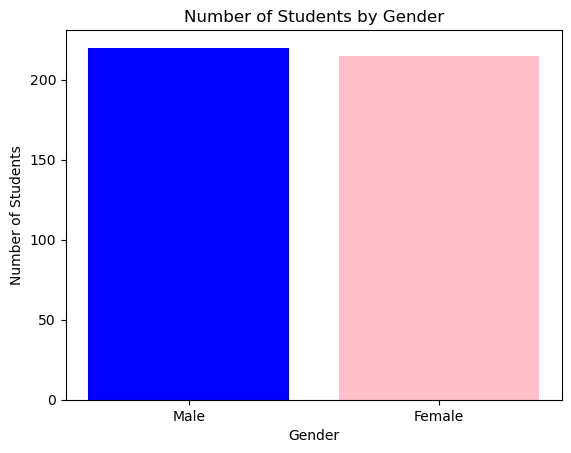

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

file_path = r'C:\users\HP\students.csv'
students_df = pd.read_csv(file_path)

students_df_copy = students_df.copy()

gender_count = students_df_copy['gender'].value_counts().reset_index()
gender_count.columns = ['Gender', 'Count']
print(gender_count)

plt.bar(gender_count['Gender'], gender_count['Count'], color=['blue', 'pink'])
plt.xlabel('Gender')
plt.ylabel('Number of Students')
plt.title('Number of Students by Gender')
plt.show()


<div style="border: 2px solid Darkred; padding: 15px; background-color: #f9f9f9;">
    <h5 style="color: Darkgreen;">
        <strong>
           
b. Plot the student ages distribution with histogram chart
</div>

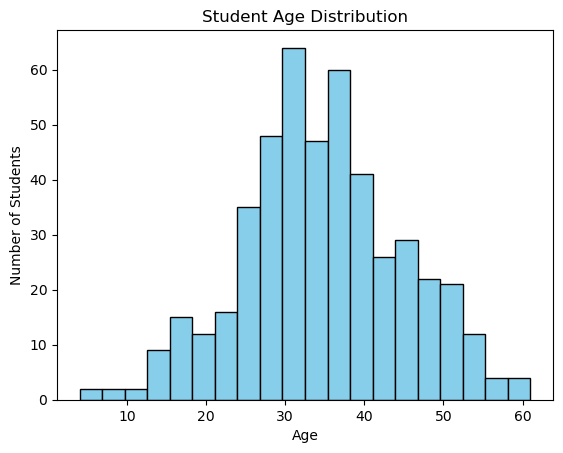

In [9]:
# Assuming the 'age' column exists in the dataset
plt.hist(students_df_copy['age'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Age')
plt.ylabel('Number of Students')
plt.title('Student Age Distribution')
plt.show()


<div style="border: 2px solid Darkred; padding: 15px; background-color: #f9f9f9;">
    <h5 style="color: Darkgreen;">
        <strong>
           
c. Find what is the city with the highest number of registered
students and what is the city with the lowest number of
registered students. </div>

In [11]:
city_count = students_df_copy['city'].value_counts();

city_highest = city_count.idxmax();
count_highest = city_count.max();

city_lowest = city_count.idxmin();
count_lowest = city_count.min();

print(f"City with highest number of students: {city_highest} ({count_highest} students)");
print(f"City with lowest number of students: {city_lowest} ({count_lowest} students)");


City with highest number of students: Tel Aviv (113 students)
City with lowest number of students: Ramat Gan (11 students)


<div style="border: 2px solid Darkred; padding: 15px; background-color: #f9f9f9;">
    <h5 style="color: Darkgreen;">
        <strong>
           
2. Explore the coursres.csv dataset and answer the following
questions, base your answers with data calculations and
visualizations if needed:<br><br>
a. Count the number of courses by category, show a dataframe
with each category and how many courses are associated
with that category.<br>
Plot bar chart to visualize your result.
<br>
</div>



                      Category  Count
0         Software Development     33
1      Data Science & Security      9
2  Product & Business Strategy      8


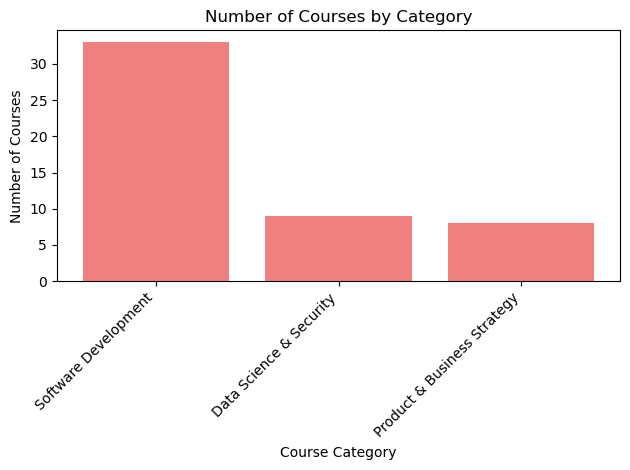

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

file_path = r'C:\users\HP\courses.csv'
courses_df = pd.read_csv(file_path);

courses_df_copy = courses_df.copy();


category_count = courses_df_copy['course_category'].value_counts().reset_index();
category_count.columns = ['Category', 'Count']
print(category_count);


plt.bar(category_count['Category'], category_count['Count'], color='lightcoral');
plt.xlabel('Course Category');
plt.ylabel('Number of Courses');
plt.title('Number of Courses by Category');
plt.xticks(rotation=45, ha='right'); 
plt.tight_layout();  
plt.show();


<div style="border: 2px solid Darkred; padding: 15px; background-color: #f9f9f9;">
    <h5 style="color: Darkgreen;">
        <strong>
           
b. Create a dataframe that shows for each category what are
the unique courses names that are associated with that
category </div>

In [14]:
category_courses = courses_df_copy.groupby('course_category')['course_name'].unique().reset_index();
category_courses.columns = ['Category', 'Unique Courses']
print(category_courses);


                      Category  \
0      Data Science & Security   
1  Product & Business Strategy   
2         Software Development   

                                      Unique Courses  
0                                            [Cyber]  
1                                  [Product Manager]  
2  [Full Stack Developer, AI Developer, DevOps En...  


<div style="border: 2px solid Darkred; padding: 15px; background-color: #f9f9f9;">
    <h5 style="color: Darkgreen;">
        <strong>
           
c. Create a dataframe that shows how many different courses
have been started in each month during 2023 year. </div>

In [15]:
courses_df_copy['course_start_date'] = pd.to_datetime(courses_df_copy['course_start_date']);

courses_2023 = courses_df_copy[courses_df_copy['course_start_date'].dt.year == 2023]

monthly_course_count = courses_2023['course_start_date'].dt.month.value_counts().sort_index().reset_index()
monthly_course_count.columns = ['Month', 'Number of Courses Started']
print(monthly_course_count);


    Month  Number of Courses Started
0       1                          2
1       2                          4
2       3                          3
3       4                          8
4       5                          2
5       6                          4
6       7                          1
7       8                          2
8       9                          7
9      10                          6
10     11                          4
11     12                          7


<div style="border: 2px solid Darkred; padding: 15px; background-color: #f9f9f9;">
    <h5 style="color: Darkgreen;">
        <strong>
           
d. Use the dataframe from the previous exercise (2.c) and
create a line chart that represent the trend of the number of opened courses during each month (x-axis should be month
date and y-axis should be number of courses in each month)
 </div>

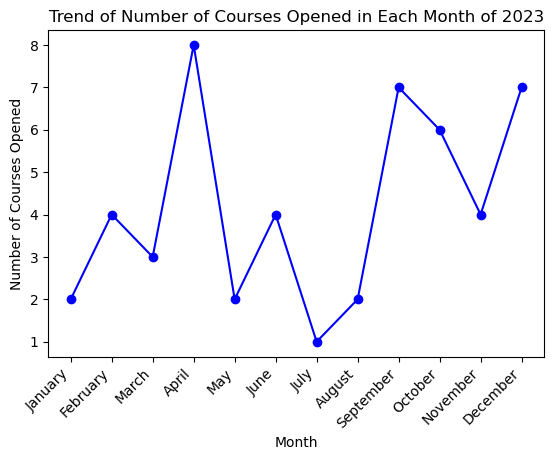

In [18]:
import matplotlib.pyplot as plt

plt.plot(monthly_course_count['Month'], monthly_course_count['Number of Courses Started'], marker='o', color='b');

plt.xlabel('Month');
plt.ylabel('Number of Courses Opened');
plt.title('Trend of Number of Courses Opened in Each Month of 2023');

plt.xticks(monthly_course_count['Month'], ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'], rotation=45, ha='right');

plt.subplots_adjust(bottom=0.2);

plt.show();


<div style="border: 2px solid Darkred; padding: 15px; background-color: #f9f9f9;">
    <h5 style="color: Darkgreen;">
        <strong>
           
3. Explore the teachers.csv dataset and answer the following
questions, base your answers with data calculations and
visualizations if needed:<br><br>
a. Calculate the mean salary for a teacher in the college.<br>
<br>
</div>

In [19]:
import pandas as pd

file_path = r'C:\users\HP\teachers.csv'
teachers_df = pd.read_csv(file_path);

teachers_df_copy = teachers_df.copy();

mean_salary = teachers_df_copy['salary'].mean();

print(f"The mean salary for a teacher in the college is: {mean_salary:.2f}");


The mean salary for a teacher in the college is: 26721.88


<div style="border: 2px solid Darkred; padding: 15px; background-color: #f9f9f9;">
    <h5 style="color: Darkgreen;">
        <strong>
           
b. Plot a scatter plot to find out the correlation between the
teacher years of experience and its salary.
Determine according to the plot if there is any correlation
between them.
 </div>

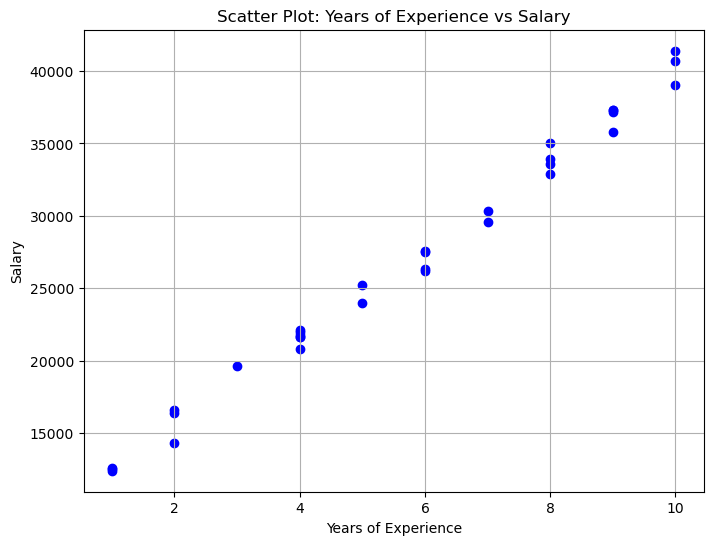

In [20]:
import pandas as pd
import matplotlib.pyplot as plt

file_path = r'C:\users\HP\teachers.csv'
teachers_df = pd.read_csv(file_path);

teachers_df_copy = teachers_df.copy();

plt.figure(figsize=(8, 6));
plt.scatter(teachers_df_copy['years_of_experience'], teachers_df_copy['salary'], color='blue');
plt.title('Scatter Plot: Years of Experience vs Salary');
plt.xlabel('Years of Experience');
plt.ylabel('Salary');
plt.grid(True);
plt.show();


<div style="border: 2px solid Darkred; padding: 15px; background-color: #f9f9f9;">
    <h5 style="color: Darkgreen;">
        <strong>
           
4. Use all datasets and answer the following questions:<br><br>
a. Find the id, name and salary of the teacher that is teaching
the most courses during 2023 year.<br>
In case there are multiple teachers, include them all in your
answer.<br>
<br>
</div>

In [27]:
import pandas as pd

teachers = pd.read_csv(r'C:\users\HP\teachers.csv');
students = pd.read_csv(r'C:\users\HP\students.csv');
courses = pd.read_csv(r'C:\users\HP\courses.csv');
student_course = pd.read_csv(r'C:\users\HP\studnet_course.csv');

courses['course_start_date'] = pd.to_datetime(courses['course_start_date']);

courses['year'] = courses['course_start_date'].dt.year

courses_2023 = courses[courses['year'] == 2023]

teacher_courses = pd.merge(student_course, courses_2023, on='course_id');

teacher_course_count = teacher_courses.groupby('id').size();

max_courses = teacher_course_count.max();
teachers_with_max_courses = teacher_course_count[teacher_course_count == max_courses]

teachers_with_max_courses_df = teachers_with_max_courses.reset_index();
teachers_with_max_courses_df.columns = ['id', 'course_count']

result = pd.merge(teachers, teachers_with_max_courses_df, on='id')[['id', 'first_name', 'last_name', 'salary']]

print(result);


   id first_name    last_name   salary
0  16     Minnie  Tattershall  30300.0
1  27       Gibb     Dargavel  12400.0
2  33     Normie       Warlaw  37300.0


<div style="border: 2px solid Darkred; padding: 15px; background-color: #f9f9f9;">
    <h5 style="color: Darkgreen;">
        <strong>
           
b. Investigate if there is a linear trend between student
education level and student grade in the course.
Use a scatter plot to support your answer.
 </div>

In [29]:
import pandas as pd

teachers = pd.read_csv(r'C:\users\HP\teachers.csv');
students = pd.read_csv(r'C:\users\HP\students.csv');
courses = pd.read_csv(r'C:\users\HP\courses.csv');
student_course = pd.read_csv(r'C:\users\HP\studnet_course.csv');

courses['course_start_date'] = pd.to_datetime(courses['course_start_date']);

courses['year'] = courses['course_start_date'].dt.year

courses_2023 = courses[courses['year'] == 2023]

teacher_courses = pd.merge(student_course, courses_2023, on='course_id');

teacher_course_count = teacher_courses.groupby('id').size();

max_courses = teacher_course_count.max();
teachers_with_max_courses = teacher_course_count[teacher_course_count == max_courses]

teachers_with_max_courses_df = teachers_with_max_courses.reset_index();
teachers_with_max_courses_df.columns = ['id', 'course_count']

result = pd.merge(teachers, teachers_with_max_courses_df, on='id')[['id', 'first_name', 'last_name', 'salary']]

print(result);


   id first_name    last_name   salary
0  16     Minnie  Tattershall  30300.0
1  27       Gibb     Dargavel  12400.0
2  33     Normie       Warlaw  37300.0


<div style="border: 2px solid Darkred; padding: 15px; background-color: #f9f9f9;">
    <h5 style="color: Darkgreen;">
        <strong>
           
c. Find for each course name (during the entire year) what was
the mean grade.
Plot a bar chart that represent your answer
 </div>

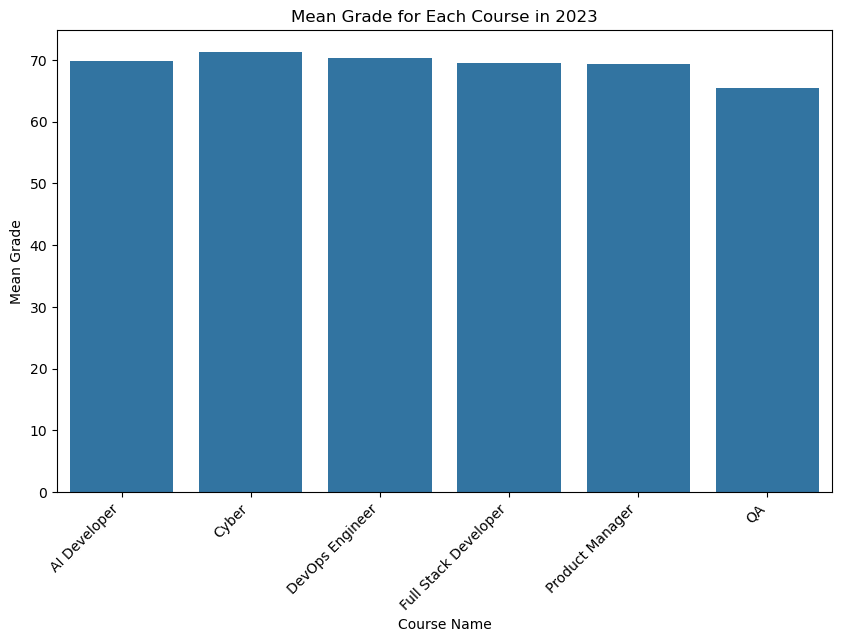

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

students = pd.read_csv(r'C:\users\HP\students.csv');
courses = pd.read_csv(r'C:\users\HP\courses.csv');
student_course = pd.read_csv(r'C:\users\HP\studnet_course.csv');

student_course_data = pd.merge(student_course, students, on='id');
student_course_data = pd.merge(student_course_data, courses, on='course_id');

course_mean_grades = student_course_data.groupby('course_name')['final_grade'].mean().reset_index();

plt.figure(figsize=(10, 6));
sns.barplot(data=course_mean_grades, x='course_name', y='final_grade');

plt.title('Mean Grade for Each Course in 2023');
plt.xlabel('Course Name');
plt.ylabel('Mean Grade');

plt.xticks(rotation=45, ha='right');

plt.show();
